Inisialisasi Awal

   t (s)  Vnoisy raw(cm/s)
0  0.000          0.000000
1  0.001          3.024994
2  0.002          1.049975
3  0.003          0.074944
4  0.004          0.099900


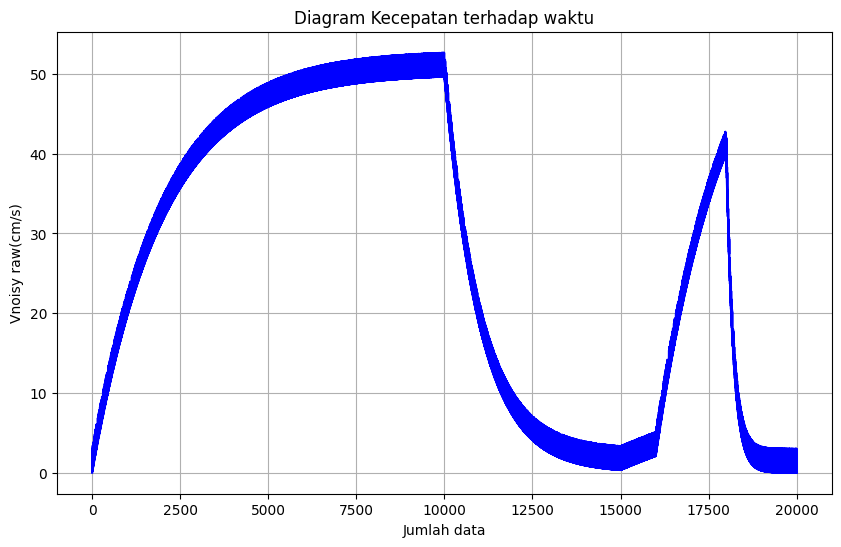

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter

file_path = r'C:\Alief\College\Semester 7\Sistem Kontrol Lanjut\Distance Estimation\velocity_time.csv'
data_kecepatan = pd.read_csv(file_path)

print(data_kecepatan.head())

y = 'Vnoisy raw(cm/s)'
x = 't (s)'

plt.figure(figsize=(10, 6))
plt.plot(data_kecepatan[y], linestyle='-', color='b')
plt.title(f'Diagram Kecepatan terhadap waktu')
plt.xlabel('Jumlah data')
plt.ylabel(y)
plt.grid(True)
plt.show()


Memberikan Filter Savitzky-Golay

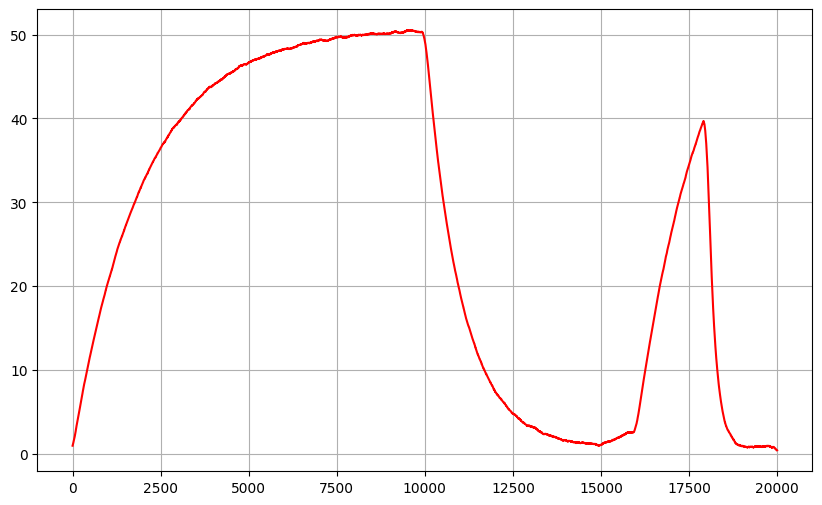

array([0.96580806, 0.97811958, 1.00554991, ..., 0.43209627, 0.4320903 ,
       0.4220844 ])

In [2]:
time = data_kecepatan [x]
velocity = data_kecepatan[y]

window = 200
poly = 1
SG_filter = savgol_filter (velocity, window_length=window, polyorder=poly, mode = 'nearest')

plt.figure(figsize=(10, 6))
plt.plot(SG_filter, linestyle='-', color='r')
plt.grid(True)
plt.show()

SG_filter


Memberikan Filter Gaussian

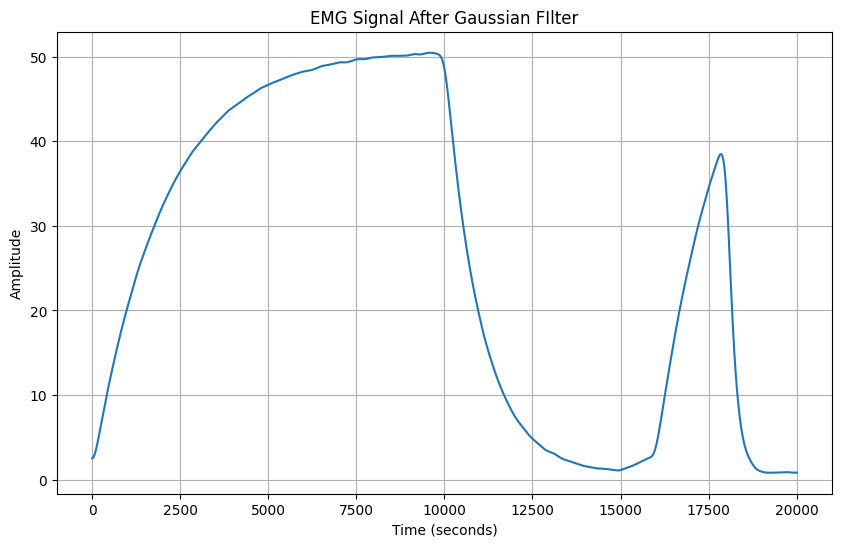

array([2.53167637, 2.53186273, 2.53223537, ..., 0.83679775, 0.836804  ,
       0.83680713])

In [6]:
G_filter = gaussian_filter(velocity, sigma=100)

plt.figure(figsize=(10, 6))
plt.plot( G_filter)
plt.title("EMG Signal After Gaussian FIlter")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

G_filter

Visualisasi Data sebelum dan setelah diberikan filter

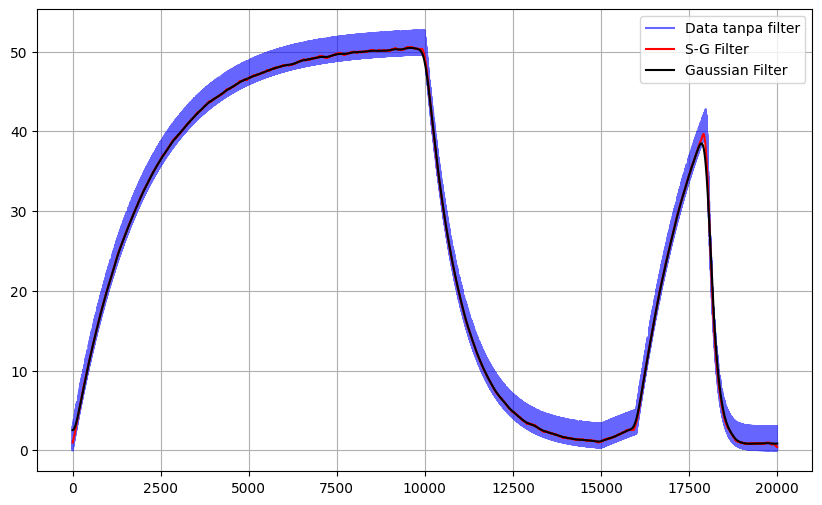

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(data_kecepatan[y], linestyle='-', color='b', alpha=0.6, label='Data tanpa filter')
plt.plot(SG_filter, linestyle='-', color='r', label='S-G Filter')
plt.plot(G_filter, color='black', label='Gaussian Filter')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()


Trapezoidal Rule untuk estimasi jarak robot

In [8]:
total=np.trapz(velocity,time)
total_filter= np.trapz(SG_filter, time)
total_filter2= np.trapz(G_filter, time)


print(total)
print(total_filter)
print(total_filter2)

522.6119413968376
522.5532874734943
522.6102580636374
